In [30]:
# load solvent accessibility values calculated using ePISA for the 
# trimeric PDB structure of the spike (6VXX) 
df_6vxx = pd.read_csv(
    "Solvent-Accessibility-PDB-6vxx-ePISA.csv", 
    usecols=[0, 1, 2, 3],
    converters={"chain": str.strip, "ASA (A^2)": float, "resiNum": int})

In [31]:
df_6vxx

,chain,resiNum,resiName,ASA (A^2)
0,A,27,ALA,79.30
1,A,28,TYR,140.54
2,A,29,THR,13.46
3,A,30,ASN,56.65
4,A,31,SER,0.67
...,...,...,...,...
2911,C,1143,PRO,54.25
2912,C,1144,GLU,126.90
2913,C,1145,LEU,125.15
2914,C,1146,ASP,106.21


In [32]:
df_6vxx.chain.value_counts()

A    972
B    972
C    972
Name: chain, dtype: int64

In [33]:
# maximum theoretical ASA values from Tien et al 2013
# (https://en.wikipedia.org/wiki/Relative_accessible_surface_area)
df_max_asa = pd.read_csv("max-ASA-Tien-2013.csv", comment="#");
df_max_asa

,AA_name,AA_code,AA_letter,theoretical_max_ASA,empirical_max_ASA
0,Alanine,Ala,A,129,121
1,Arginine,Arg,R,274,265
2,Asparagine,Asn,N,195,187
3,Aspartate,Asp,D,193,187
4,Cysteine,Cys,C,167,148
5,Glutamate,Glu,E,223,214
6,Glutamine,Gln,Q,225,214
7,Glycine,Gly,G,104,97
8,Histidine,His,H,224,216
9,Isoleucine,Ile,I,197,195


In [34]:
aa_code_to_max_ASA = {
    code.upper(): float(max_value) 
    for (code, max_value) in zip(df_max_asa.AA_code, df_max_asa.theoretical_max_ASA)
};
aa_code_to_max_ASA

{'ALA': 129.0,
 'ARG': 274.0,
 'ASN': 195.0,
 'ASP': 193.0,
 'CYS': 167.0,
 'GLU': 223.0,
 'GLN': 225.0,
 'GLY': 104.0,
 'HIS': 224.0,
 'ILE': 197.0,
 'LEU': 201.0,
 'LYS': 236.0,
 'MET': 224.0,
 'PHE': 240.0,
 'PRO': 159.0,
 'SER': 155.0,
 'THR': 172.0,
 'TRP': 285.0,
 'TYR': 263.0,
 'VAL': 174.0}

In [43]:
df_a = df_6vxx[df_6vxx.chain == "A"];
df_b = df_6vxx[df_6vxx.chain == "B"];
df_c = df_6vxx[df_6vxx.chain == "C"];
df = df_a[["resiNum", "resiName"]].copy()
# take the average ASA value for the three chains;
# ideally they would be identical but the structure 
# isn't symmetrical
df["ASA"] = (
    df_a["ASA (A^2)"].values + 
    df_b["ASA (A^2)"].values + 
    df_c["ASA (A^2)"].values) / 3
df["relative_solvent_accessibility"] = np.array([
    asa / aa_code_to_max_ASA[aa_code]
    for (aa_code, asa)
    in zip(df["resiName"], df["ASA"])
])

In [44]:
df

,resiNum,resiName,ASA,relative_solvent_accessibility
0,27,ALA,79.020000,0.612558
1,28,TYR,141.200000,0.536882
2,29,THR,13.620000,0.079186
3,30,ASN,56.733333,0.290940
4,31,SER,0.503333,0.003247
...,...,...,...,...
967,1143,PRO,54.200000,0.340881
968,1144,GLU,127.730000,0.572780
969,1145,LEU,125.193333,0.622852
970,1146,ASP,106.213333,0.550328


[(0, 1)]

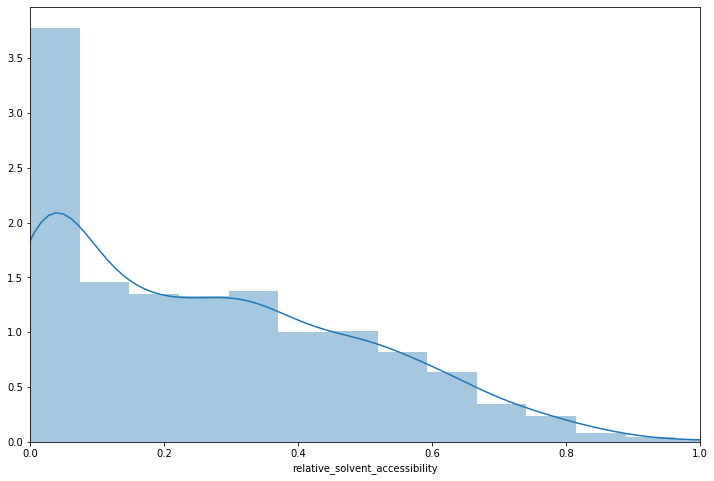

In [50]:
%matplotlib inline 
import seaborn
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
g = seaborn.distplot(df.relative_solvent_accessibility)
g.set(xlim=(0,1))
fig.savefig("rel")